In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

### data processing

In [3]:
broken_feature = pd.read_csv('../data/all_broken_2017-06-25.csv')

In [5]:
broken_feature

,checkpoint,feature,current pct,last good pct,last good dt,last good median,last good stdev,num rules,rule id list
0,dispatch,bifrost_cache_miss,100.00,0.02,2017-01-17,5.185,3.066730,0,NaN
1,dispatch,bifrost_fetch_ts,100.00,0.02,2017-01-17,5.185,3.066730,0,NaN
2,dispatch,bifrost_offer_ts,100.00,7.50,2017-01-17,14.145,4.664680,0,NaN
3,dispatch,country_id,100.00,0.02,2017-01-17,5.185,3.066730,0,NaN
4,post_payment_profile_add,request_device_verified,28.94,0.00,2017-04-24,0.000,0.000000,0,NaN
...,...,...,...,...,...,...,...,...,...
427,adjust_fare,rails_agent_tags,100.00,0.26,2017-04-06,0.300,0.083342,0,NaN
428,adjust_fare,rails_has_appeasement_note,98.84,0.04,2017-04-06,0.020,0.025271,1,103
429,adjust_fare,total_non_eats_original_fare_usd_90d,71.28,8.96,2017-05-01,6.495,2.111805,0,NaN
430,adjust_fare,total_non_eats_original_fare_usd_ltd,61.54,7.19,2017-05-01,6.215,2.117783,0,NaN


In [7]:
list(broken_feature.columns.values)

['checkpoint',
 'feature',
 'current pct',
 'last good pct',
 'last good dt',
 'last good median',
 'last good stdev',
 'num rules',
 'rule id list']

In [13]:
broken_feature.dtypes

checkpoint           object
feature              object
current pct         float64
last good pct       float64
last good dt         object
last good median    float64
last good stdev     float64
num rules             int64
rule id list         object
dtype: object

In [16]:
broken_feature.shape

(432, 9)

In [20]:
broken_feature[['num rules']] = broken_feature[['num rules']].apply(pd.to_numeric)

In [21]:
broken_feature['last good dt'] = pd.to_datetime (broken_feature['last good dt'])

In [22]:
broken_feature.dtypes

checkpoint                  object
feature                     object
current pct                float64
last good pct              float64
last good dt        datetime64[ns]
last good median           float64
last good stdev            float64
num rules                    int64
rule id list                object
dtype: object

In [23]:
broken_feature.head()

,checkpoint,feature,current pct,last good pct,last good dt,last good median,last good stdev,num rules,rule id list
0,dispatch,bifrost_cache_miss,100.00,0.02,2017-01-17,5.185,3.06673,0,NaN
1,dispatch,bifrost_fetch_ts,100.00,0.02,2017-01-17,5.185,3.06673,0,NaN
2,dispatch,bifrost_offer_ts,100.00,7.50,2017-01-17,14.145,4.66468,0,NaN
3,dispatch,country_id,100.00,0.02,2017-01-17,5.185,3.06673,0,NaN
4,post_payment_profile_add,request_device_verified,28.94,0.00,2017-04-24,0.000,0.00000,0,NaN


In [27]:
broken_feature.sort_values(['checkpoint','feature','num rules'], ascending = [True, True, False], inplace=True)

In [28]:
broken_feature.head()

,checkpoint,feature,current pct,last good pct,last good dt,last good median,last good stdev,num rules,rule id list
58,account_update,changed_by_admin,100.0,13.6,2017-01-17,0.0,5.462896,5,33|513|2909|2911|3577
59,account_update,country_id,100.0,13.6,2017-01-17,0.0,5.462896,3,33|2909|2911
60,account_update,has_confirmed_mobile,100.0,0.0,2017-01-10,0.0,0.000000,0,NaN
61,account_update,mobile_changed,100.0,13.6,2017-01-17,0.0,5.462896,2,33|2911
62,account_update,old_mobile_country_id,100.0,13.6,2017-01-17,0.0,5.462896,0,NaN


In [30]:
broken_feature = broken_feature.drop_duplicates()

In [31]:
broken_feature.shape

(432, 9)

<AxesSubplot:>

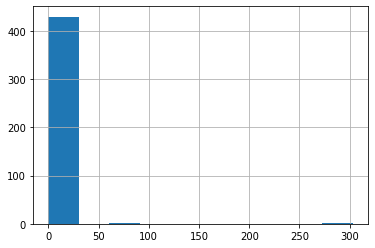

In [32]:
broken_feature['num rules'].hist(bins=10)

<AxesSubplot:>

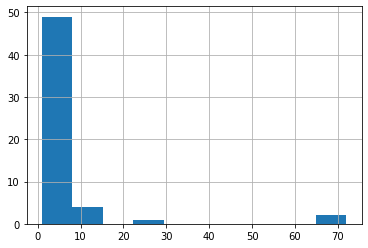

In [35]:
broken_feature.query(" `num rules` > 0 and `num rules` <100")['num rules'].hist(bins=10)

In [38]:
bf=broken_feature.query(" `num rules` > 0")

In [39]:
bf[bf['last good median'] > bf['last good stdev']].head()

,checkpoint,feature,current pct,last good pct,last good dt,last good median,last good stdev,num rules,rule id list
410,adjust_fare,num_completed_non_eats_trips_90d,71.28,8.96,2017-05-01,6.495,2.111805,1,2823
420,adjust_fare,pct_non_eats_trips_w_non_cf_rp_tl_adj_or_non_a...,71.28,8.96,2017-05-01,6.495,2.111805,1,2823
98,appease_client,num_completed_non_eats_trips_90d,58.33,8.20,2017-05-01,5.470,1.621262,2,2811|2883
108,appease_client,pct_non_eats_trips_w_non_cf_rp_tl_adj_or_non_a...,58.33,8.20,2017-05-01,5.470,1.621262,2,2811|2883
117,appease_client,rails_has_appeasement_note,97.39,1.68,2017-04-06,2.110,0.335446,1,285


In [40]:
bf.shape

(57, 9)

In [41]:
#number of unique features
bf.feature.nunique()

53

In [42]:
#### find features that have used in multiple checkpoints
bf.groupby('feature').filter(lambda x: len(x)>1).sort_values(['feature'], ascending=True)

,checkpoint,feature,current pct,last good pct,last good dt,last good median,last good stdev,num rules,rule id list
33,device_add,charged_trip_count,38.62,16.11,2017-06-15,9.185,2.579611,2,487|1247
16,trip_request,charged_trip_count,0.22,0.10,2017-06-19,0.100,0.018223,303,3|19|21|147|161|163|175|177|179|181|183|193|21...
410,adjust_fare,num_completed_non_eats_trips_90d,71.28,8.96,2017-05-01,6.495,2.111805,1,2823
98,appease_client,num_completed_non_eats_trips_90d,58.33,8.20,2017-05-01,5.470,1.621262,2,2811|2883
420,adjust_fare,pct_non_eats_trips_w_non_cf_rp_tl_adj_or_non_a...,71.28,8.96,2017-05-01,6.495,2.111805,1,2823
108,appease_client,pct_non_eats_trips_w_non_cf_rp_tl_adj_or_non_a...,58.33,8.20,2017-05-01,5.470,1.621262,2,2811|2883
428,adjust_fare,rails_has_appeasement_note,98.84,0.04,2017-04-06,0.020,0.025271,1,103
117,appease_client,rails_has_appeasement_note,97.39,1.68,2017-04-06,2.110,0.335446,1,285


In [48]:
### parse out the rule_id_list and each rule_id have each row
bfr_rule = bf['rule id list'].str.split('|', expand=True).stack().reset_index(level=0)  \
            .set_index('level_0').rename(columns={0:'rule_id'}).join(bf.drop(columns=['rule id list','last good median', 'last good stdev']), how='left')

In [49]:
bfr_rule.head(20)

,rule_id,checkpoint,feature,current pct,last good pct,last good dt,num rules
8,603,auto_adjust_bad_routes,rails_original_fare_amount,0.25,0.05,2017-04-07,1
9,3397,trip_request,account_credit_promotion_count,99.41,26.51,2017-04-26,1
10,933,trip_request,app_version_banned_trip_ratio,85.65,3.41,2017-05-10,1
11,933,trip_request,app_version_banned_trips,85.65,3.41,2017-05-10,1
16,3,trip_request,charged_trip_count,0.22,0.10,2017-06-19,303
16,19,trip_request,charged_trip_count,0.22,0.10,2017-06-19,303
16,21,trip_request,charged_trip_count,0.22,0.10,2017-06-19,303
16,147,trip_request,charged_trip_count,0.22,0.10,2017-06-19,303
16,161,trip_request,charged_trip_count,0.22,0.10,2017-06-19,303
16,163,trip_request,charged_trip_count,0.22,0.10,2017-06-19,303


In [50]:
bfr_rule.shape

(637, 7)

In [59]:
bfr_rule.rule_id.nunique()

465

In [63]:
bfr_rule.rule_id.dtypes

dtype('int64')

In [64]:
bfr_rule.query("rule_id == 1005")

,rule_id,checkpoint,feature,current pct,last good pct,last good dt,num rules
16,1005,trip_request,charged_trip_count,0.22,0.1,2017-06-19,303


In [65]:
### check rule_id used at multiple checkpoints  - one rule should not used in multiple checkpoints
rule_multi_cp = pd.DataFrame(bfr_rule.groupby('rule_id').checkpoint.nunique()).query('checkpoint >= 2')
rule_multi_cp.head(20)

,checkpoint
rule_id,


In [67]:

## if yes, find which rule in which checkpoints
rule_multi_cp_2 = pd.merge(bfr_rule, rule_multi_cp, how='inner', left_on = ['rule_id'], right_index=True)
rule_multi_cp_2.head()

rule_multi_cp_2.sort_values(['rule_id', 'checkpoint_x', 'last good dt'], ascending=[True, True, True], inplace=True)
rule_multi_cp_3 = rule_multi_cp_2.drop_duplicates(['rule_id', 'checkpoint_x'], keep='first')
rule_multi_cp_3.head()

,rule_id,checkpoint_x,feature,current pct,last good pct,last good dt,num rules,checkpoint_y


In [68]:
rule_multi_cp_4 = pd.pivot_table(rule_multi_cp_3,index=['rule_id'],values=['checkpoint_x','feature'],aggfunc=lambda x: ', '.join(x))
rule_multi_cp_4.head()

""
rule_id


In [69]:
### the dataset having unique rule_id, to be joined with rule_tagging table
bfr_rule.sort_values(['rule_id', 'last good dt'], ascending=[True, True], inplace=True)
bfr_rule_unique = bfr_rule.drop_duplicates(['rule_id'], keep='first')
bfr_rule_unique.head()

,rule_id,checkpoint,feature,current pct,last good pct,last good dt,num rules
16,3,trip_request,charged_trip_count,0.22,0.10,2017-06-19,303
16,19,trip_request,charged_trip_count,0.22,0.10,2017-06-19,303
16,21,trip_request,charged_trip_count,0.22,0.10,2017-06-19,303
58,33,account_update,changed_by_admin,100.00,13.60,2017-01-17,5
428,103,adjust_fare,rails_has_appeasement_note,98.84,0.04,2017-04-06,1


In [ ]:
query = """
select *
from legulus.rule_tagging
where datestr >='1111-11-11'
"""
rule_tag = sqlContext.sql(query).toPandas()

In [70]:
rule_tag = pd.read_pickle('rule_tag_0629.pickle')

In [71]:
rule_tag.head()

,program_tag,checkpoint_id,note,sub_program_tag,action_name,action_type,rule_description,status,rule,updated_at,rule_id,checkpoint_name,action_id,datestr
0,untagged,57,NA,untagged,raise_verify_payment_error,challenge,rule_u4f_test,evaluate,rule_u4f_test,2017-01-04 23:59:03,1849,account_invite,19,1111-11-11
1,untagged,57,NA,untagged,set_verify_device_tag,set_tag,rule_u4f_test,evaluate,rule_u4f_test,2017-01-04 23:59:03,1849,account_invite,59,1111-11-11
2,payment,57,NA,u4f,set_verify_device_tag,set_tag,rule_new_u4f_invite_cvv_verification,evaluate,rule_new_u4f_invite_cvv_verification,2017-06-16 00:36:30,1885,account_invite,59,1111-11-11
3,payment,57,NA,u4f,raise_verify_payment_error,challenge,rule_new_u4f_invite_cvv_verification,evaluate,rule_new_u4f_invite_cvv_verification,2017-06-16 00:36:30,1885,account_invite,19,1111-11-11
4,payment,57,NA,payment,set_require_email_confirmation_tag,set_tag,rule_block_u4f_add_account_cnhk_fraudster,inactive,rule_block_u4f_add_account_cnhk_fraudster_acco...,2017-03-04 01:45:15,2225,account_invite,15,1111-11-11


In [73]:
rule_tag.groupby('action_type').count() ['rule_id']

action_type
auth_hold        41
ban             285
challenge       342
new             250
notification     44
rails            28
raise_error     381
restrict        728
revoke_promo     70
set_tag         525
test             17
unused            1
whitelist         4
Name: rule_id, dtype: int64

In [75]:
rule_tag_bfr = pd.merge(rule_tag, bfr_rule_unique, how='left', on=['rule_id'])
rule_tag_bfr.head()

,program_tag,checkpoint_id,note,sub_program_tag,action_name,action_type,rule_description,status,rule,updated_at,rule_id,checkpoint_name,action_id,datestr,checkpoint,feature,current pct,last good pct,last good dt,num rules
0,untagged,57,NA,untagged,raise_verify_payment_error,challenge,rule_u4f_test,evaluate,rule_u4f_test,2017-01-04 23:59:03,1849,account_invite,19,1111-11-11,NaN,NaN,NaN,NaN,NaT,NaN
1,untagged,57,NA,untagged,set_verify_device_tag,set_tag,rule_u4f_test,evaluate,rule_u4f_test,2017-01-04 23:59:03,1849,account_invite,59,1111-11-11,NaN,NaN,NaN,NaN,NaT,NaN
2,payment,57,NA,u4f,set_verify_device_tag,set_tag,rule_new_u4f_invite_cvv_verification,evaluate,rule_new_u4f_invite_cvv_verification,2017-06-16 00:36:30,1885,account_invite,59,1111-11-11,NaN,NaN,NaN,NaN,NaT,NaN
3,payment,57,NA,u4f,raise_verify_payment_error,challenge,rule_new_u4f_invite_cvv_verification,evaluate,rule_new_u4f_invite_cvv_verification,2017-06-16 00:36:30,1885,account_invite,19,1111-11-11,NaN,NaN,NaN,NaN,NaT,NaN
4,payment,57,NA,payment,set_require_email_confirmation_tag,set_tag,rule_block_u4f_add_account_cnhk_fraudster,inactive,rule_block_u4f_add_account_cnhk_fraudster_acco...,2017-03-04 01:45:15,2225,account_invite,15,1111-11-11,NaN,NaN,NaN,NaN,NaT,NaN


In [76]:
rule_tag_bfr[rule_tag_bfr['program_tag'].notnull()].rule_id.nunique()

1612

In [77]:
null_rule = rule_tag_bfr[rule_tag_bfr['program_tag'].isnull()]
null_rule.rule_id.nunique()

0

In [78]:
def f_act(row):
    if row['action_type'] == 'ban':
        return '1_ban'
    elif row['action_type'] =='restrict':
        return '2_restrict'
    elif row['action_type'] =='challenge':
        return '3_challenge'
    elif row['action_type'] =='raise_error':
        return '4_raise_error'
    elif row['action_type'] =='set_tag':
        return '5_set_tag'
    else:
        return '6_other'

In [79]:
rule_tag_bfr['f_action_type'] = rule_tag_bfr.apply(f_act, axis=1)
rule_tag_bfr.head()

,program_tag,checkpoint_id,note,sub_program_tag,action_name,action_type,rule_description,status,rule,updated_at,rule_id,checkpoint_name,action_id,datestr,checkpoint,feature,current pct,last good pct,last good dt,num rules,f_action_type
0,untagged,57,NA,untagged,raise_verify_payment_error,challenge,rule_u4f_test,evaluate,rule_u4f_test,2017-01-04 23:59:03,1849,account_invite,19,1111-11-11,NaN,NaN,NaN,NaN,NaT,NaN,3_challenge
1,untagged,57,NA,untagged,set_verify_device_tag,set_tag,rule_u4f_test,evaluate,rule_u4f_test,2017-01-04 23:59:03,1849,account_invite,59,1111-11-11,NaN,NaN,NaN,NaN,NaT,NaN,5_set_tag
2,payment,57,NA,u4f,set_verify_device_tag,set_tag,rule_new_u4f_invite_cvv_verification,evaluate,rule_new_u4f_invite_cvv_verification,2017-06-16 00:36:30,1885,account_invite,59,1111-11-11,NaN,NaN,NaN,NaN,NaT,NaN,5_set_tag
3,payment,57,NA,u4f,raise_verify_payment_error,challenge,rule_new_u4f_invite_cvv_verification,evaluate,rule_new_u4f_invite_cvv_verification,2017-06-16 00:36:30,1885,account_invite,19,1111-11-11,NaN,NaN,NaN,NaN,NaT,NaN,3_challenge
4,payment,57,NA,payment,set_require_email_confirmation_tag,set_tag,rule_block_u4f_add_account_cnhk_fraudster,inactive,rule_block_u4f_add_account_cnhk_fraudster_acco...,2017-03-04 01:45:15,2225,account_invite,15,1111-11-11,NaN,NaN,NaN,NaN,NaT,NaN,5_set_tag


In [92]:
rule_tag_bfr['cp_null'] = np.where(rule_tag_bfr['checkpoint'].isnull, 'Y','N')

In [94]:
rule_tag_bfr.to_csv('../data/rule_tag_bfr{:%Y%m%d}.csv'.format(pd.Timestamp('today'))) ###rule_tag_bfr20210507.csv

In [86]:
bfr_rule_tag = rule_tag_bfr[rule_tag_bfr.checkpoint.notnull()]
bfr_rule_tag.head()

,program_tag,checkpoint_id,note,sub_program_tag,action_name,action_type,rule_description,status,rule,updated_at,rule_id,checkpoint_name,action_id,datestr,checkpoint,feature,current pct,last good pct,last good dt,num rules,f_action_type
7,untagged,5,NA,untagged,raise_verify_existing_mobile_error,challenge,,inactive,new_rider_change_mobile,2015-11-03 01:42:01,33,account_update,29,1111-11-11,account_update,changed_by_admin,100.0,13.6,2017-01-17,5.0,3_challenge
8,untagged,5,NA,untagged,raise_account_update_blocked_error,restrict,Block account updates for users who are tagged,inactive,tagged_rider_block_profile_edits,2016-07-07 04:39:28,513,account_update,115,1111-11-11,account_update,changed_by_admin,100.0,13.6,2017-01-17,5.0,2_restrict
9,untagged,5,NA,untagged,raise_error_processing_request,restrict,Block account updates for users who are tagged,inactive,tagged_rider_block_profile_edits,2016-07-07 04:39:28,513,account_update,65,1111-11-11,account_update,changed_by_admin,100.0,13.6,2017-01-17,5.0,2_restrict
18,ato,5,NA,driver_ato,set_user_edited_email_tag,set_tag,User updated email from new device,active,user_updated_email,2017-05-26 04:35:56,2909,account_update,545,1111-11-11,account_update,changed_by_admin,100.0,13.6,2017-01-17,5.0,5_set_tag
19,ato,5,NA,driver_ato,set_user_edited_mobile_number_tag,set_tag,User updated mobile from new device,active,user_updated_mobile,2017-05-26 04:36:09,2911,account_update,543,1111-11-11,account_update,changed_by_admin,100.0,13.6,2017-01-17,5.0,5_set_tag


In [90]:
pv = bfr_rule_tag.pivot_table(values='rule_id', index=['f_action_type'], columns='status', \
                             aggfunc=lambda x: len(x.dropna().unique()), dropna=True, fill_value=0, margins=True)

##count unqiue X values
### pv.sort_values(by=('All'), ascending=False,inplace=True)

In [91]:
pv

status,active,evaluate,inactive,All
f_action_type,,,,
1_ban,57,9,15,81
2_restrict,111,31,56,198
3_challenge,57,26,7,90
4_raise_error,66,9,38,113
5_set_tag,89,25,27,141
6_other,62,9,13,84
All,263,72,95,430


In [81]:
## # rules with multiple broken features
bfr_rule_mul_f = pd.pivot_table(rule_tag_bfr,index=['rule_id','checkpoint'],values=['feature'], aggfunc=lambda x: ', '.join(x))
pd.set_option('display.max_colwidth', -1)
bfr_rule_mul_f.head(20)

,,feature
rule_id,checkpoint,
3,trip_request,"charged_trip_count, charged_trip_count"
33,account_update,changed_by_admin
103,adjust_fare,rails_has_appeasement_note
129,appease_client,rails_appeasement_amount
147,trip_request,charged_trip_count
161,trip_request,"charged_trip_count, charged_trip_count"
163,trip_request,charged_trip_count
175,trip_request,"charged_trip_count, charged_trip_count"
177,trip_request,"charged_trip_count, charged_trip_count"


In [17]:
import pandas as pd
import numpy as np
import datetime
import pytz
from pandas.tseries.offsets import *
import os
import json
import time
import matplotlib.pyplot as plt
%matplotlib inline

from pyspark.sql import SQLContext
import pyspark.sql as psql
from pyspark import SparkConf, SparkContext

import sys
import matplotlib.mlab as mlab
import scipy
import scipy.stats as st
import seaborn as sns

pd.set_option('display.max_columns', None)